## Anomaly Detection

In [1]:
#needed to work!
available_graphics_toolkits
graphics_toolkit('gnuplot')

ans = 
{
  [1,1] = gnuplot
}


In [2]:
%% Initialization
clear ; close all; clc

warning ("off", "Octave:broadcast");
warning ("off", "Octave:possible-matlab-short-circuit-operator");
warning ("off", "Octave:divide-by-zero");

In [3]:
%plot -f svg

## Loading the Dataset

Visualizing example dataset for outlier detection.



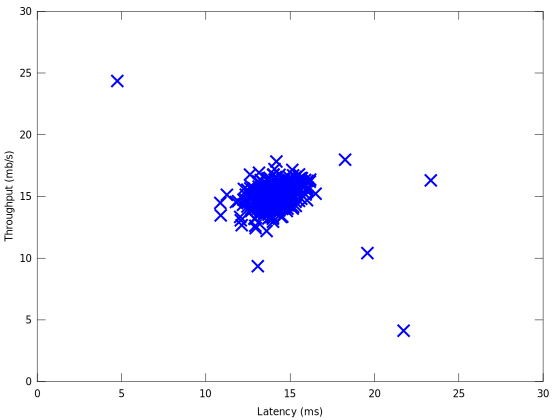

In [4]:
fprintf('Visualizing example dataset for outlier detection.\n\n');

%  The following command loads the dataset. You should now have the
%  variables X, Xval, yval in your environment
load('data/ex8data1.mat');

%  Visualize the example dataset
plot(X(:, 1), X(:, 2), 'bx');
axis([0 30 0 30]);
xlabel('Latency (ms)');
ylabel('Throughput (mb/s)');

## Estimate the dataset statistics

Visualizing Gaussian fit.



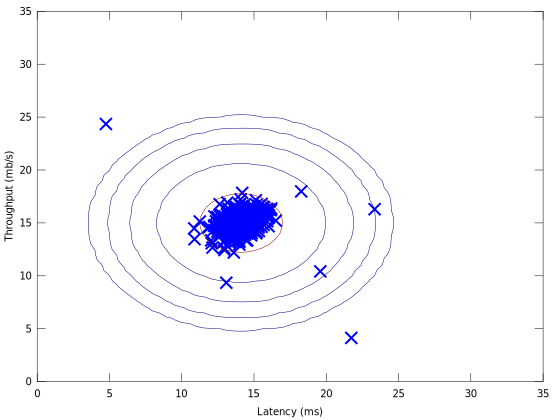

In [5]:
fprintf('Visualizing Gaussian fit.\n\n');

%  Estimate my and sigma2
[mu sigma2] = estimateGaussian(X);

%  Returns the density of the multivariate normal at each data point (row) 
%  of X
p = multivariateGaussian(X, mu, sigma2);

%  Visualize the fit
visualizeFit(X,  mu, sigma2);
xlabel('Latency (ms)');
ylabel('Throughput (mb/s)');

## Find Outliers

Best epsilon found using cross-validation: 8.990853e-05
Best F1 on Cross Validation Set:  0.875000
   (you should see a value epsilon of about 8.99e-05)



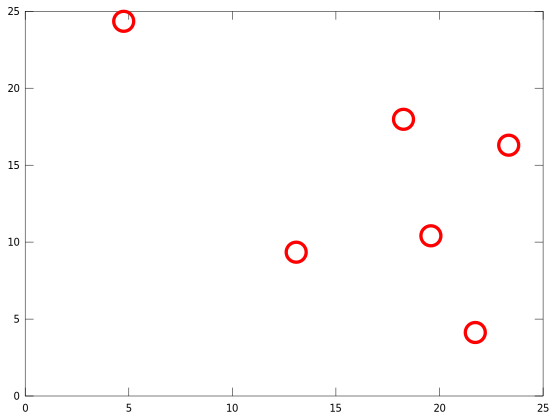

In [6]:
pval = multivariateGaussian(Xval, mu, sigma2);

[epsilon F1] = selectThreshold(yval, pval);
fprintf('Best epsilon found using cross-validation: %e\n', epsilon);
fprintf('Best F1 on Cross Validation Set:  %f\n', F1);
fprintf('   (you should see a value epsilon of about 8.99e-05)\n\n');

%  Find the outliers in the training set and plot the
outliers = find(p < epsilon);

%  Draw a red circle around those outliers
hold on
plot(X(outliers, 1), X(outliers, 2), 'ro', 'LineWidth', 2, 'MarkerSize', 10);
hold off

## Multidimensional Outliers

In [8]:
%  Loads the second dataset. You should now have the
%  variables X, Xval, yval in your environment
load('data/ex8data2.mat');

%  Apply the same steps to the larger dataset
[mu sigma2] = estimateGaussian(X);

%  Training set 
p = multivariateGaussian(X, mu, sigma2);

%  Cross-validation set
pval = multivariateGaussian(Xval, mu, sigma2);

%  Find the best threshold
[epsilon F1] = selectThreshold(yval, pval);

fprintf('Best epsilon found using cross-validation: %e\n', epsilon);
fprintf('Best F1 on Cross Validation Set:  %f\n', F1);
fprintf('# Outliers found: %d\n', sum(p < epsilon));
fprintf('   (you should see a value epsilon of about 1.38e-18)\n\n');

Best epsilon found using cross-validation: 1.377229e-18
Best F1 on Cross Validation Set:  0.615385
# Outliers found: 117
   (you should see a value epsilon of about 1.38e-18)

